# NPV MINI PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset and do primary study of data. Perform following steps: 

a. Reading some rows of dataset

b. Learn data types of all features

c. See the statistical properties of the data.

In [2]:
df1 = pd.read_csv('emp_health.csv')
df1.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [8]:
df1.columns

Index(['id', 'age', 'sex', 'bmi', 'dependent', 'alcohol', 'smoke', 'zone',
       'expenditure'],
      dtype='object')

In [9]:
df1.index

RangeIndex(start=0, stop=1338, step=1)

In [10]:
df1.describe(include='all')

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
count,1338,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338,1338.000000
unique,1338,NaN,2,NaN,NaN,5,2,8,NaN
top,i10190,NaN,male,NaN,NaN,daily,no,east,NaN
freq,1,NaN,676,NaN,NaN,395,1064,262,NaN
mean,NaN,39.207025,NaN,30.663397,1.094918,NaN,NaN,NaN,13270.422265
std,NaN,14.049960,NaN,6.098187,1.205493,NaN,NaN,NaN,12110.011237
min,NaN,18.000000,NaN,15.960000,0.000000,NaN,NaN,NaN,1121.873900
25%,NaN,27.000000,NaN,26.296250,0.000000,NaN,NaN,NaN,4740.287150
50%,NaN,39.000000,NaN,30.400000,1.000000,NaN,NaN,NaN,9382.033000
75%,NaN,51.000000,NaN,34.693750,2.000000,NaN,NaN,NaN,16639.912515


Q.1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [19]:
df1[(df1['age']>50) & (df1['smoke']=='yes')]['expenditure'].mean()

38820.22308234375

Q.2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [46]:
f = df1[ (df1.sex == 'female') & (df1.alcohol != 'daily')].count()
f_tot = df1[df1['sex']=='female'].count()

print("Number of female employee who don't consume alcohol daily : ", f[0])
print("Proportion with respect to total female employee :",round(f[0]/f_tot[0]*100, 2),"%")

Number of female employee who don't consume alcohol daily :  453
Proportion with respect to total female employee : 68.43 %


Q.3. Display zone wise average expenditure of employees on health

In [51]:
pd.pivot_table(data=df1,index='zone', aggfunc='mean')[['expenditure']]

,expenditure
zone,
east,13774.679941
north,14102.583403
northeast,13694.721724
northwest,12151.702619
south,14715.689519
southeast,14452.949680
southwest,12717.083869
west,12182.998872


Q.4. Employees of which zone did maximum expenditure on health

In [67]:
pd.pivot_table(data=df1,index='zone', aggfunc='sum')[['expenditure']].sort_values(by='expenditure',ascending=False).iloc[[0]]

,expenditure
zone,
east,3.608966e+06


Q.5. What is the minimum expenditure done by any employee in organization

In [69]:
df1.sort_values(by='expenditure', ascending=True).iloc[[0]]

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
940,i10952,18,male,23.21,0,party,no,southeast,1121.8739


Q.6. What is average expenditure of employees who have 2 or lesser dependents

In [81]:
df1[df1['dependent']<=2]['expenditure'].mean()

13040.970970948145

Q.7. How many employees are below age of 20 years. What is their average BMI

In [82]:
df1[df1['age']<20]['bmi'].mean()

29.971496350364966

Q.8. Create a dataframe "non_smoker" for all non-smoker male employees

In [143]:
non_smoker = df1[(df1['smoke']=='no') & (df1['sex']=='male')]
non_smoker

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


Q.9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [144]:
non_alcoholic = df1[(df1['alcohol']=='no') & (df1['sex']=='male')]
non_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


Q.10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol

In [145]:
non_smoking_alcoholic = pd.merge(non_smoker[['id','smoke']],non_alcoholic[['id','alcohol']], how='inner', on='id')
non_smoking_alcoholic

,id,smoke,alcohol
0,i10030,no,no
1,i10036,no,no
2,i10040,no,no
3,i10049,no,no
4,i10079,no,no
...,...,...,...
104,i11273,no,no
105,i11282,no,no
106,i11322,no,no
107,i11332,no,no


Q.11.What is the count for each zone with respect to number of dependent

In [14]:
df1.groupby(by=['zone', 'dependent']).count()[['id']].rename(columns = {'id':'count'})

count
zone      dependent       
east      0            124
          1             65
          2             42
          3             22
          4              6
          5              3
north     0             26
          1             20
          2             10
          3             12
          4              1
          5              1
northeast 0             35
          1              9
          2             15
          3             13
          4              2
northwest 0             70
          1             28
          2             30
          3             13
          4              4
south     0             38
          1             21
          2             12
          3             12
          4              1
southeast 0             81
          1             57
          2             38
          3             15
          4              2
          5              5
southwest 0            116
          1             53
          2             44
          3             25
          4              6
          5              7
west      0             84
          1             71
          2             49
          3             45
          4              3
          5              2

Q.12. Classify the employees into 3 categories.
 
 Category 1 : employees below 18.5 bmi - underweight
 
 Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit
 
 Category 3 : employee with bmi over 24.9 - overweight
 
 What is the average expenditure of employees in each category.
 
 Display the bar chart for the same


In [25]:
underweight = df1[df1['bmi']<18.5]
fit = df1[(df1['bmi']>=18.5) & (df1['bmi']<=24.9)]
overweight = df1[df1['bmi']>24.9]

In [24]:
avg_uw = underweight['expenditure'].mean()
avg_ft = fit['expenditure'].mean()
avg_ow = overweight['expenditure'].mean()

print("Average expenditure for employee in category 'Underweight' :",avg_uw)
print("Average expenditure for employee in category 'Fit' :",avg_ft)
print("Average expenditure for employee in category 'Overweight' :",avg_ow)

Average expenditure for employee in category 'Underweight' : 8852.200585000002
Average expenditure for employee in category 'Fit' : 10379.499732162163
Average expenditure for employee in category 'Overweight' : 13936.616823466235


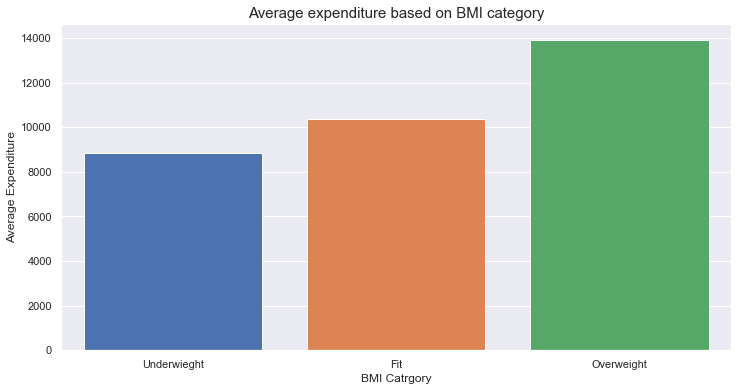

In [88]:
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')

sns.barplot(x=["Underwieght", 'Fit', 'Overweight'], y=[avg_uw, avg_ft, avg_ow], saturation=1)

plt.xlabel('BMI Catrgory')
plt.ylabel('Average Expenditure')
plt.title("Average expenditure based on BMI category",fontsize=15)
plt.show()

Q. 13. Draw line plot of expenditure against age and BMI

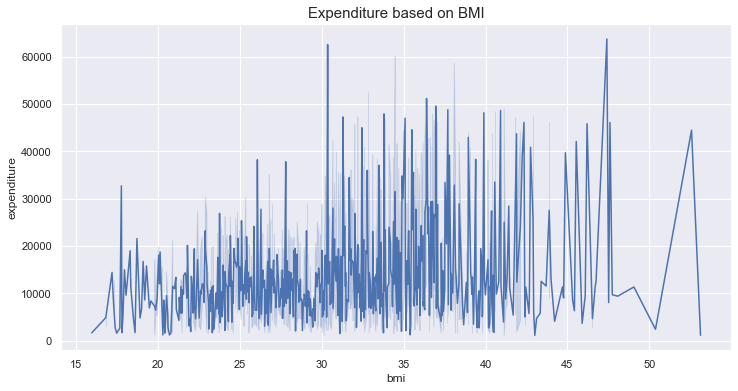

In [89]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df1, x='bmi', y='expenditure')
plt.title('Expenditure based on BMI',fontsize=15)
plt.show()

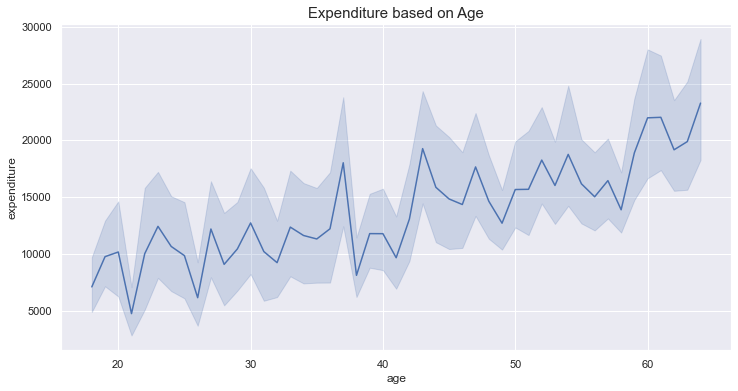

In [90]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df1, x='age', y='expenditure')
plt.title('Expenditure based on Age',fontsize=15)
plt.show()

Q.14. Draw a bar chart to show zone wise average expenditure

In [64]:
df2 = pd.pivot_table(data=df1, index='zone')[['expenditure']].reset_index()
df2

,zone,expenditure
0,east,13774.679941
1,north,14102.583403
2,northeast,13694.721724
3,northwest,12151.702619
4,south,14715.689519
5,southeast,14452.949680
6,southwest,12717.083869
7,west,12182.998872


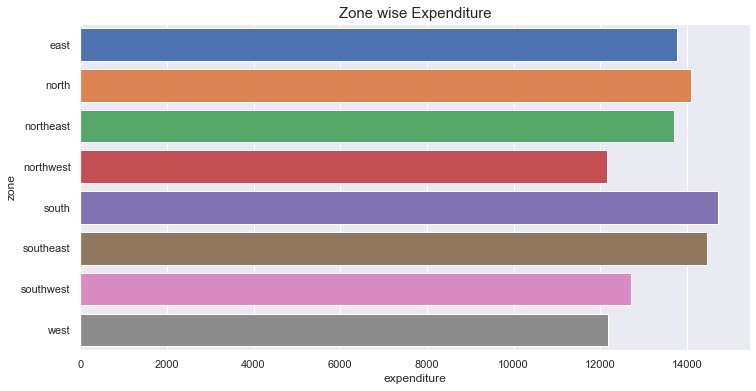

In [87]:
plt.figure(figsize=(12,6))
sns.barplot(data=df2, y='zone', x='expenditure', orientation='horizontal', saturation=1)
plt.title('Zone wise Expenditure', fontsize=15)
plt.show()

Q.15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

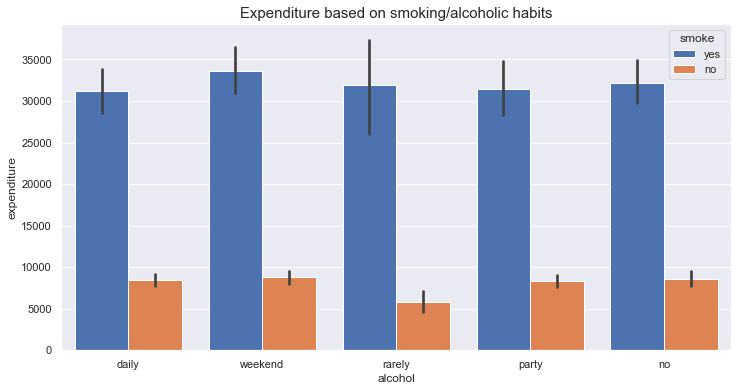

In [94]:
plt.figure(figsize=(12,6))
sns.barplot(data=df1, x='alcohol', y='expenditure', hue='smoke', saturation=1)
plt.title('Expenditure based on smoking/alcoholic habits', fontsize=15)
plt.show()

Q. 16. Draw pie chart for alcohol consumption habits

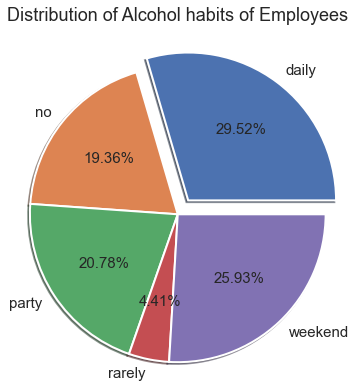

In [146]:
df2 = df1.groupby(by='alcohol').count()[['id']].rename(columns={'id':'count'}).reset_index()

plt.pie(data=df2, x='count', labels='alcohol',autopct='%1.2f%%', wedgeprops={'linewidth':2,'edgecolor':'white'}, 
           radius=1.7, explode=[0.2,0,0,0,0], shadow=True, textprops={'fontsize':15})

plt.title("Distribution of Alcohol habits of Employees", pad=85, fontdict={'fontsize':18})

plt.show()

Q.17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

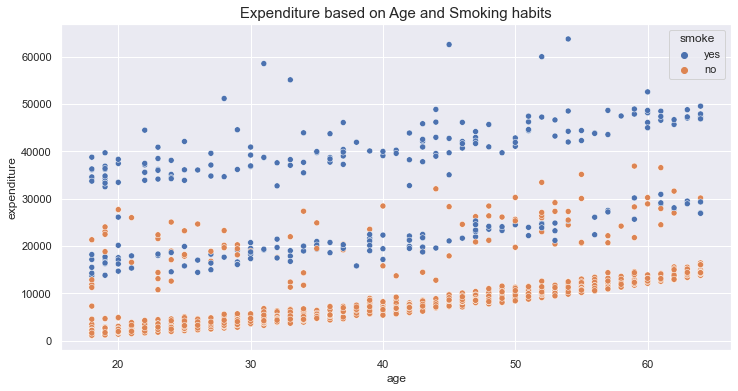

In [115]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df1,x='age',y='expenditure', hue='smoke')
plt.title('Expenditure based on Age and Smoking habits', fontsize=15)
plt.show()

Q.18. Draw distribution plot of expenditure

C:\Users\karth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


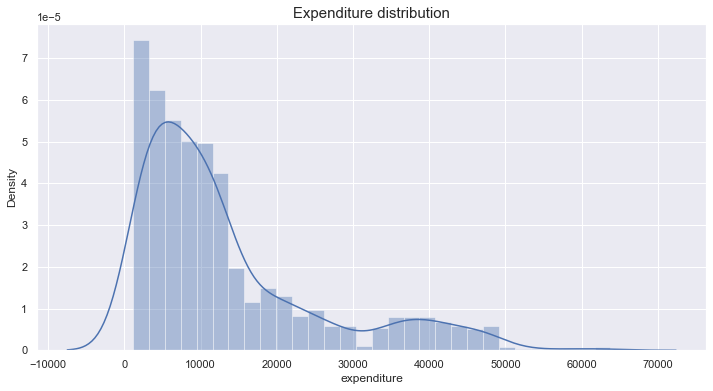

In [122]:
plt.figure(figsize=(12,6))
sns.distplot(a=df1['expenditure'], hist=True)
plt.title('Expenditure distribution', fontsize=15)
plt.show()

Q. 19. Display the pairplot

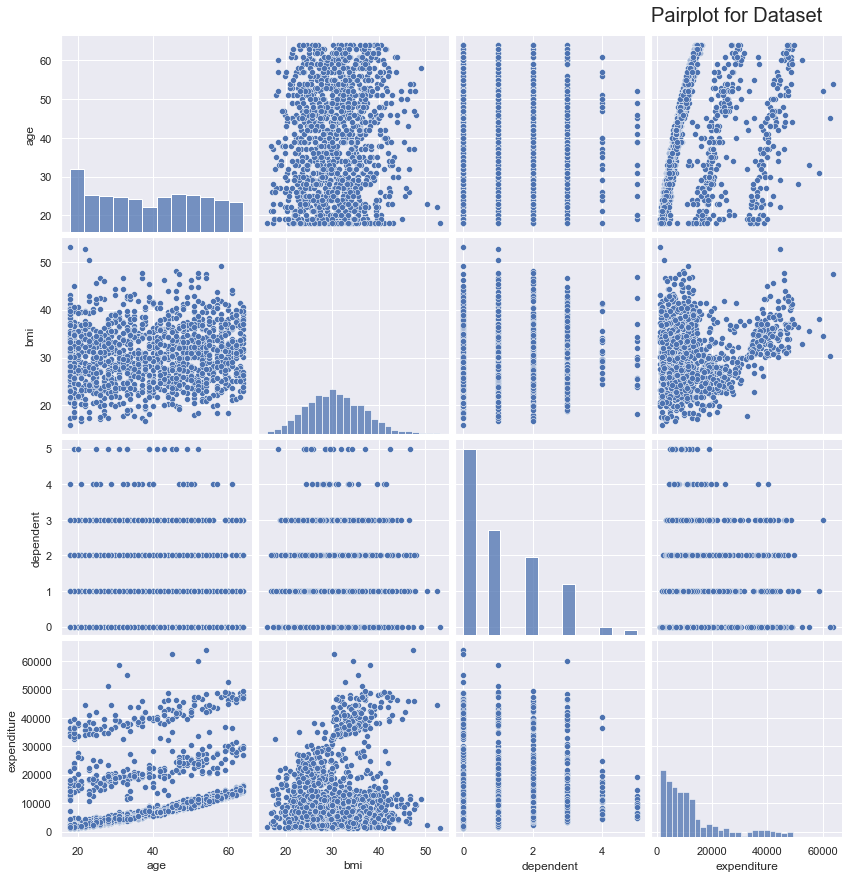

In [140]:
sns.pairplot(df1, height=3)
plt.title("Pairplot for Dataset", loc='left', pad=620, fontsize=20)
plt.show()

Q.20. Display heatmap for the data

In [128]:
cmatrix = df1.corr()

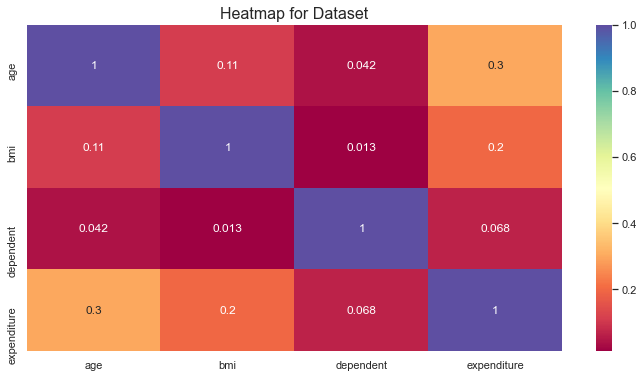

In [129]:
plt.figure(figsize=(12,6))
sns.heatmap(cmatrix,annot=True, cmap='Spectral')
plt.title('Heatmap for Dataset', fontsize=16)
plt.show()